# Nos EUA, o número 911 é destinado à emergências. O Kaggle disponibilizou dados de ligações para o serviço:

    lat: Variável String, Latitude
    lng: Variável String, Longitude
    desc: Variável String, Descrição da Chamada de Emergência
    zip: Variável String, CEP
    título: Variável String, Título
    timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
    twp: Variável String, Township
    addr: Variável String, Endereço
    e: Variável String, variável Dummy (sempre 1)
    
    Siglas:
    
    EMS	emergency medical service
    



In [109]:
import pandas as pd
import numpy as np
import calendar
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from matplotlib import colors
from matplotlib.font_manager import FontProperties
import seaborn as sns

In [110]:
call = pd.read_csv('/temp/911.csv', ',')

In [111]:
#primeiros tratamentos no dataset

#excluindo variaveis que não serão utéis
df = call.drop(['e'], axis=1, inplace=False)
df = df.drop(['zip'], axis=1, inplace=False)

#criando variavel reason / motivos
df['Type'] = call['title'].str.split(':',1, expand=True)[0]
df['Reason'] = call['title'].str.split(':',1, expand=True)[1]

#cria lista com os nomes da semana
wday = list(calendar.day_abbr)

#convertendo para datatime e criando as variaveis de hour / hora, day / dia, month / mes, year / ano, week / semana
df['timeStamp'] = pd.to_datetime(call['timeStamp'])
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Day'] = df['timeStamp'].apply(lambda x: x.day)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Year'] = df['timeStamp'].apply(lambda x: x.year)
df['Week'] = df['timeStamp'].apply(lambda x: x.weekday())
df['Week_Abbr'] = df['timeStamp'].apply(lambda x: wday[x.weekday()])



In [112]:
df.head(1)

,lat,lng,desc,title,timeStamp,twp,addr,Type,Reason,Hour,Day,Month,Year,Week,Week_Abbr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,17,10,12,2015,3,Thu


In [113]:
resposta = [["Type","Qualitativa Nominal"],
            ["Reason","Qualitativa Nominal"],
            ["Week","Qualitativa Nominal"],
            ["Month","Quantitativa Discreta"],
            ["Year","Quantitativa Discreta"],
            ["Hour","Quantitativa Discreta"]]
variaveis = pd.DataFrame(resposta, columns=["Variavel", "Classificação"])
variaveis

,Variavel,Classificação
0,Type,Qualitativa Nominal
1,Reason,Qualitativa Nominal
2,Week,Qualitativa Nominal
3,Month,Quantitativa Discreta
4,Year,Quantitativa Discreta
5,Hour,Quantitativa Discreta


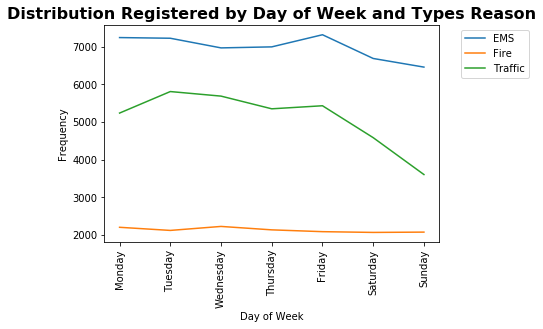

In [123]:
_, ax = plt.subplots()

row_labels = ['','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

X = df[df['Type'] == 'EMS'].groupby(['Week']).size()
Y = df[df['Type'] == 'Fire'].groupby(['Week']).size()
Z = df[df['Type'] == 'Traffic'].groupby(['Week']).size()
        
ax.plot(X, label="EMS")
ax.plot(Y, label="Fire")
ax.plot(Z, label="Traffic")

ax.legend(loc='best')
ax.legend(bbox_to_anchor=(1.05, 1.0))

ax.set_xlabel('Day of Week')
ax.set_ylabel('Frequency')
ax.set_xticklabels(row_labels, rotation='vertical')
ax.set_title('Distribution Registered by Day of Week and Types Reason', fontsize=16, fontweight='bold')

fig.tight_layout()
plt.show()

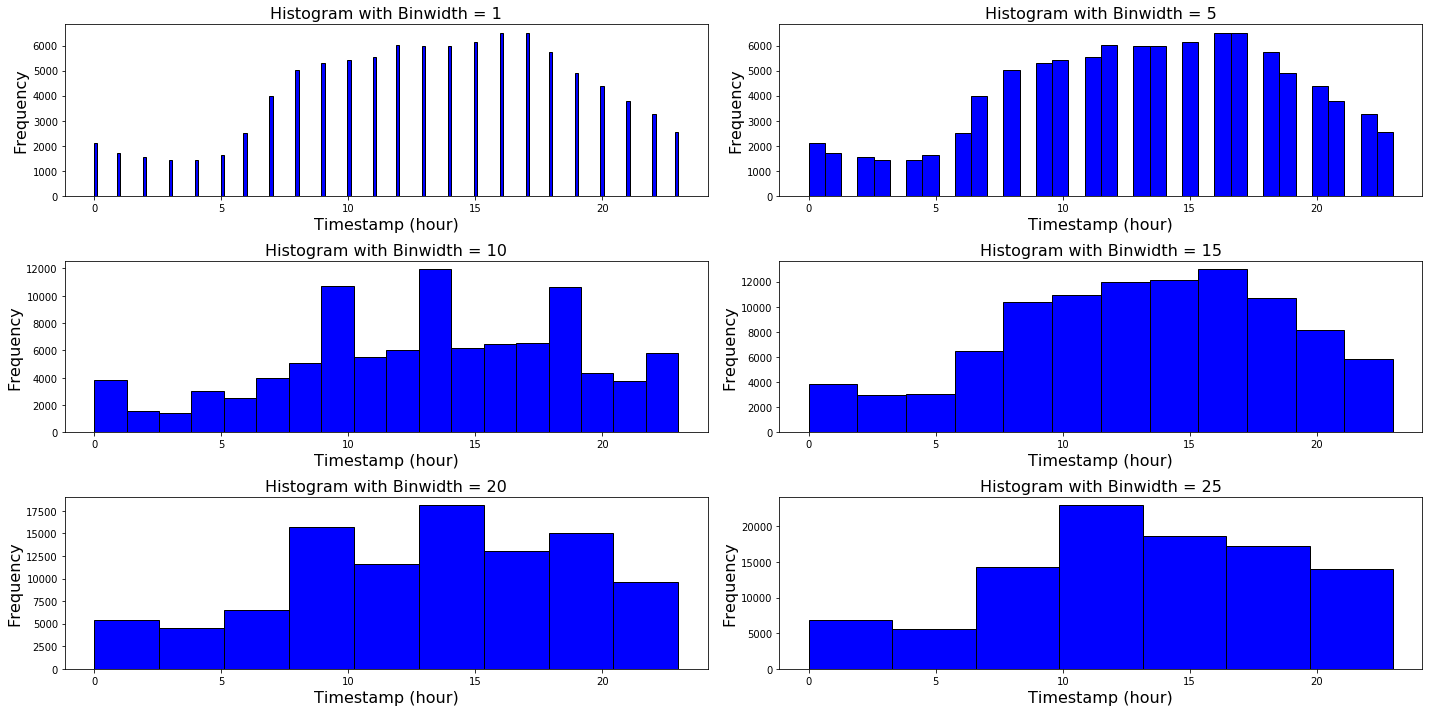

In [116]:
fig, ax = plt.subplots(figsize=(20, 10))

# Show 4 different binwidths
for i, binwidth in enumerate([1, 5, 10, 15, 20, 25]):
   
    # Set up the plot
    ax = plt.subplot(3, 2, i + 1)
    
    # Draw the plot
    ax.hist(df['Hour'], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
        
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 16)
    ax.set_xlabel('Timestamp (hour)', size = 16)
    ax.set_ylabel('Frequency', size= 16)

fig.tight_layout()
plt.show()

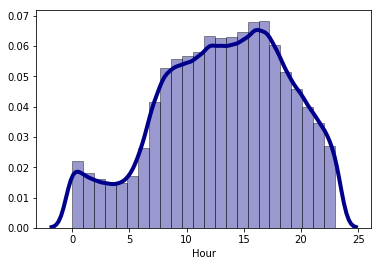

In [117]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df['Hour'], hist=True, kde=True, 
             bins=24, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

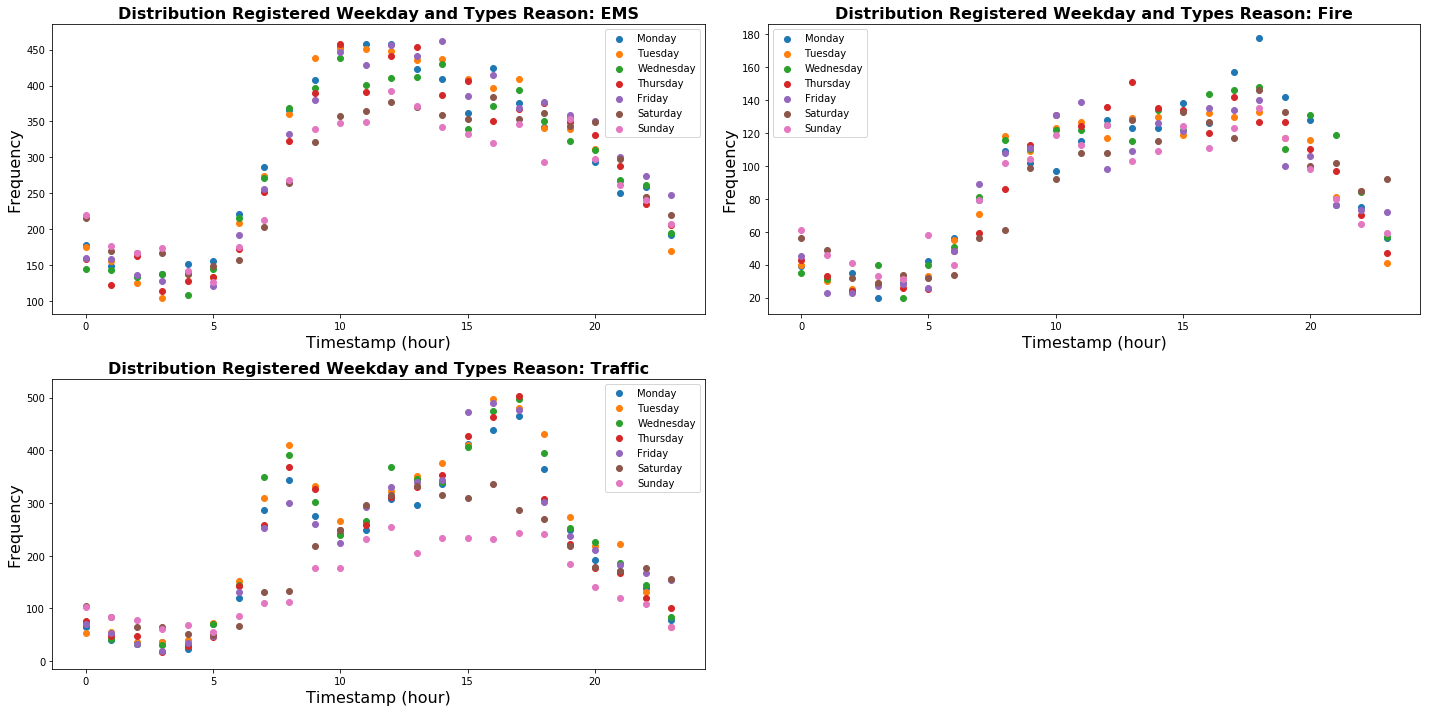

In [118]:
fig, ax = plt.subplots(figsize=(20, 10))

# Show 4 different binwidths
for i in enumerate(['EMS','Fire','Traffic']):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i[0] + 1)
    
    W1 = df[(df['Type'] == i[1]) & (df['Week'] == 0)].groupby(['Hour']).size().reset_index(name='Qty')
    W2 = df[(df['Type'] == i[1]) & (df['Week'] == 1)].groupby(['Hour']).size().reset_index(name='Qty')
    W3 = df[(df['Type'] == i[1]) & (df['Week'] == 2)].groupby(['Hour']).size().reset_index(name='Qty')
    W4 = df[(df['Type'] == i[1]) & (df['Week'] == 3)].groupby(['Hour']).size().reset_index(name='Qty')
    W5 = df[(df['Type'] == i[1]) & (df['Week'] == 4)].groupby(['Hour']).size().reset_index(name='Qty')
    W6 = df[(df['Type'] == i[1]) & (df['Week'] == 5)].groupby(['Hour']).size().reset_index(name='Qty')
    W7 = df[(df['Type'] == i[1]) & (df['Week'] == 6)].groupby(['Hour']).size().reset_index(name='Qty')
    
    ax.scatter(W1['Hour'], W1['Qty'], label="Monday")
    ax.scatter(W2['Hour'], W2['Qty'], label="Tuesday")
    ax.scatter(W3['Hour'], W3['Qty'], label="Wednesday")
    ax.scatter(W4['Hour'], W4['Qty'], label="Thursday")
    ax.scatter(W5['Hour'], W5['Qty'], label="Friday")
    ax.scatter(W6['Hour'], W6['Qty'], label="Saturday")
    ax.scatter(W7['Hour'], W7['Qty'], label="Sunday")

    ax.legend(loc='best')
    #ax.legend(bbox_to_anchor=(1.35, 1.05))
    
    ax.set_xlabel('Timestamp (hour)', fontsize=16,)
    ax.set_ylabel('Frequency', fontsize=16)
    ax.set_title('Distribution Registered Day of Week and Types Reason: ' + i[1], fontsize=16, fontweight='bold')
    
    
fig.tight_layout()
plt.show()

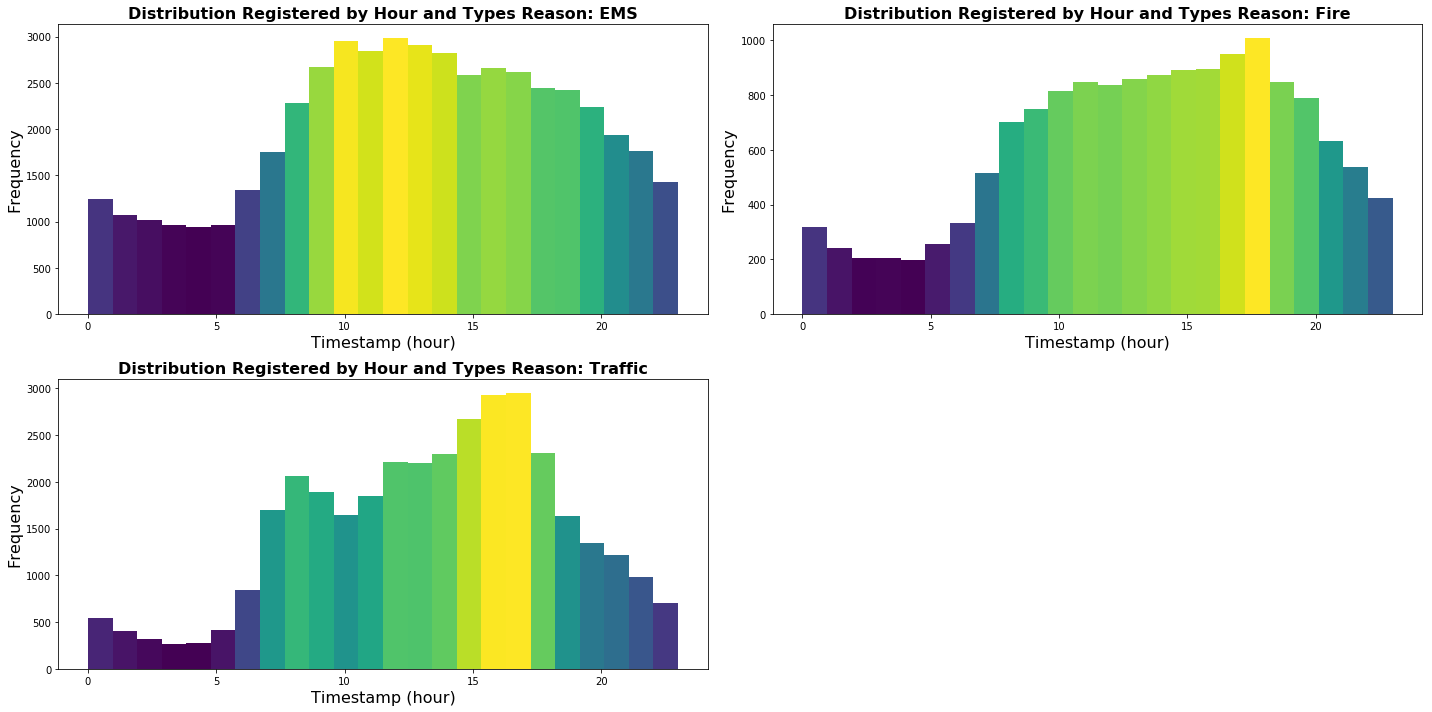

In [119]:
fig, ax = plt.subplots(figsize=(20, 10))

# Show 4 different binwidths
for i in enumerate(['EMS','Fire','Traffic']):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i[0] + 1)
    
    data = df[df['Type'] == i[1]]['Hour']
    n_bins = 24

    # N is the count in each bin, bins is the lower-limit of the bin
    N, bins, patches = ax.hist(data, bins=n_bins)

    # We'll color code by height, but you could use any scalar
    fracs = N / N.max()

    # we need to normalize the data to 0..1 for the full range of the colormap
    norm = colors.Normalize(fracs.min(), fracs.max())

    # Now, we'll loop through our objects and set the color of each accordingly
    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)
        
    # We can also normalize our inputs by the total number of counts
    ax.hist(data, bins=n_bins, density=True)
    
    ax.set_xlabel('Timestamp (hour)', fontsize=16,)
    ax.set_ylabel('Frequency', fontsize=16)
    ax.set_title('Distribution Registered by Hour and Types Reason: ' + i[1], fontsize=16, fontweight='bold')
    
fig.tight_layout()
plt.show()